In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train_house_prices.csv')
test = pd.read_csv('test_house_prices.csv')

### Tell apart categorical and numerical features

In [3]:
numerical = [f for f in train.columns if train.dtypes[f] != 'object']
numerical.remove('SalePrice')
numerical.remove('Id')
categorical = [f for f in train.columns if train.dtypes[f] == 'object']

### Check the distribution of the target feature

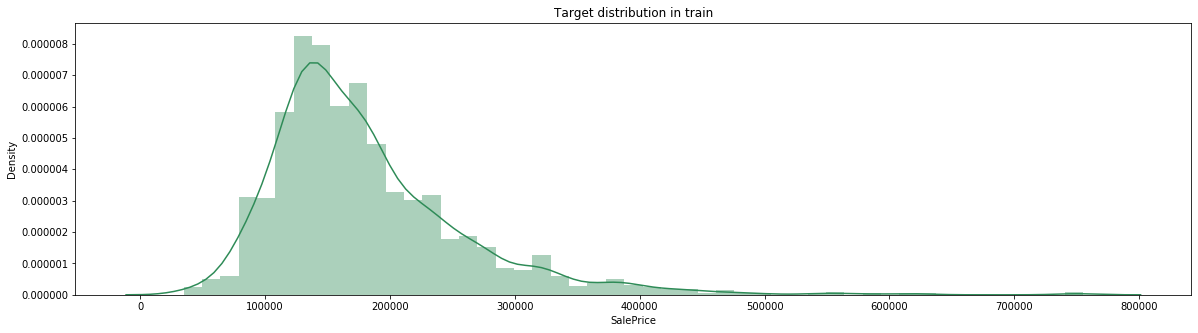

In [4]:
plt.figure(figsize=(20,5))
sns.distplot(train.SalePrice, color="seagreen")
plt.title("Target distribution in train")
plt.ylabel("Density");

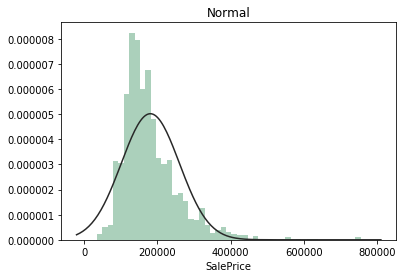

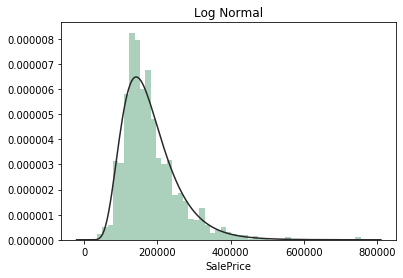

In [8]:
y = train['SalePrice']
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm, color="seagreen")
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm, color="seagreen")

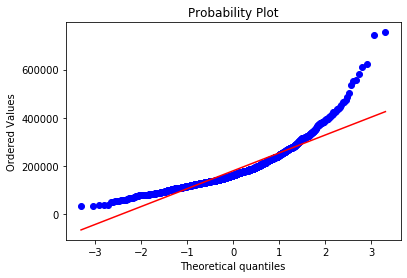

In [11]:
res = stats.probplot(train['SalePrice'], plot=plt)

#### Conducting a Shapiro-Wilk test for normality. Was the data drawn from a normal distribution?

In [12]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train[numerical])
normal = normal.apply(test_normality)
print(not normal.any())

False


#### Review
- The sale price distribution is right-skewed and shows extreme outliers.
- log-transform the target values, as we will use some loss built on mean-squared-error which assumes that our target distribution is normal.

Text(0, 0.5, 'Density')

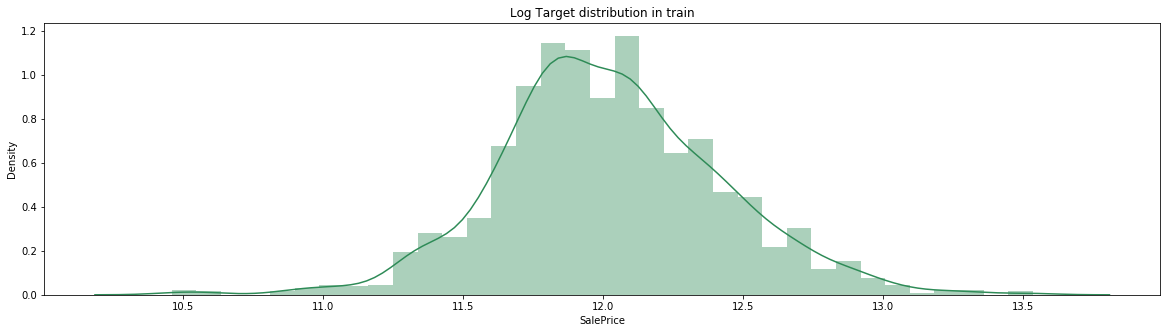

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(np.log(train.SalePrice), color="seagreen")
plt.title("Log Target distribution in train")
plt.ylabel("Density")

#### Do the log-transformation

In [18]:
train['SalePrice'] = np.log(train['SalePrice'])

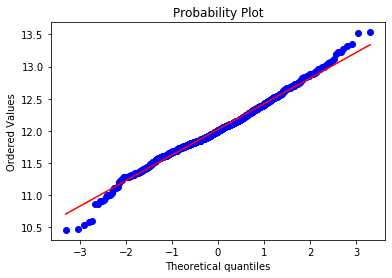

In [19]:
res = stats.probplot(train['SalePrice'], plot=plt)

#### Handle missing values

In [20]:
combined = train.drop(["SalePrice", "LogSalePrice"], axis=1).append(test)
nan_percentage = combined.isnull().sum().sort_values(ascending=False) / combined.shape[0]
missing_val = nan_percentage[nan_percentage > 0]

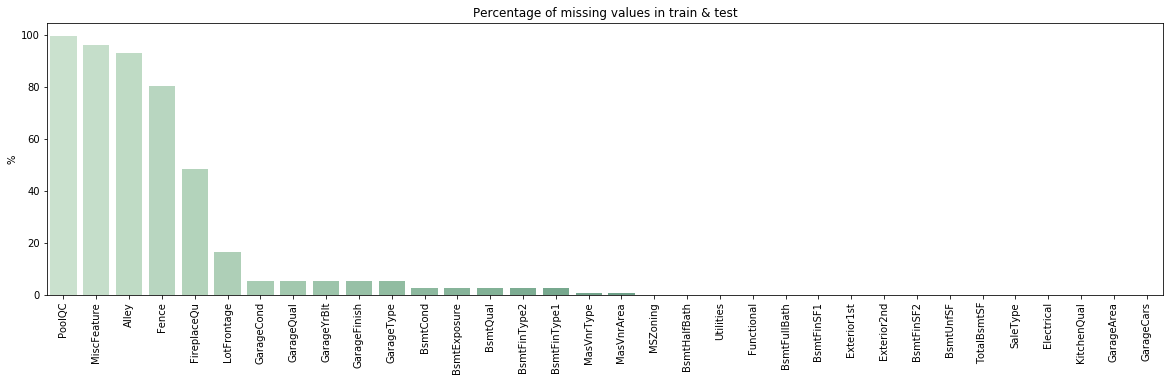

In [21]:
plt.figure(figsize=(20,5))
sns.barplot(x=missing_val.index.values, y=missing_val.values * 100, palette="ch:2.5,-.2,dark=.3");
plt.title("Percentage of missing values in train & test");
plt.ylabel("%");
plt.xticks(rotation=90);

In [22]:
categorical

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [28]:
to_be_dropped = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']